In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.pandas.read_csv("data/kelly1984.csv", sep=',')
df

,heelstick,catheter
0,23.0,25.2
1,33.2,26.0
2,16.6,16.3
3,26.3,27.2
4,20.0,23.2
5,20.0,18.1
6,20.6,22.2
7,18.9,17.2
8,17.8,18.8
9,20.0,16.4


In [4]:
X = df['heelstick'].values
Y = df['catheter'].values

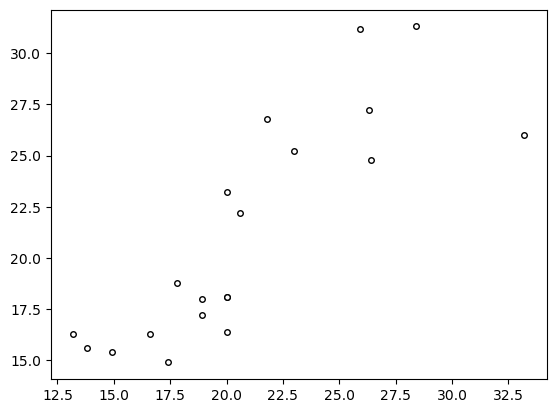

In [5]:
plt.scatter(X, Y, s=16, c='w', edgecolors='k')
plt.show()

In [6]:
from mltools.estimators import LinearLS
from mltools.scores import modified_zscore

In [7]:
regr_ls = LinearLS()
regr_ls.fit(X[:,None], Y)
mod_ls = regr_ls.model
print(np.asarray(mod_ls.param))

[2.78635496 0.8805392 ]


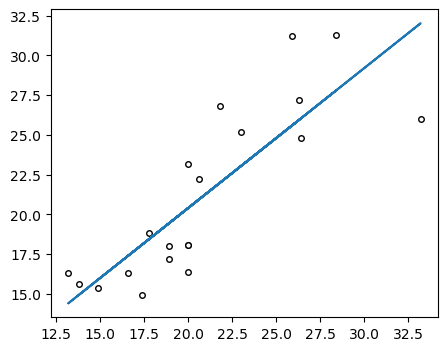

In [8]:
plt.figure(figsize=(5,4))
plt.scatter(X, Y, s=16, c='w', edgecolors='k')
plt.plot(X, mod_ls.evaluate(X[:,None]))
plt.show()

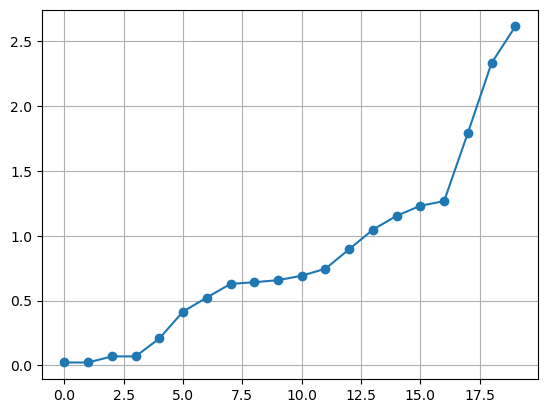

In [10]:
Y_e = mod_ls.evaluate(X[:,None])
E = abs(Y - Y_e)
Z = modified_zscore(E)
plt.plot(sorted(abs(Z)), marker='o')
plt.grid(1)
plt.show()

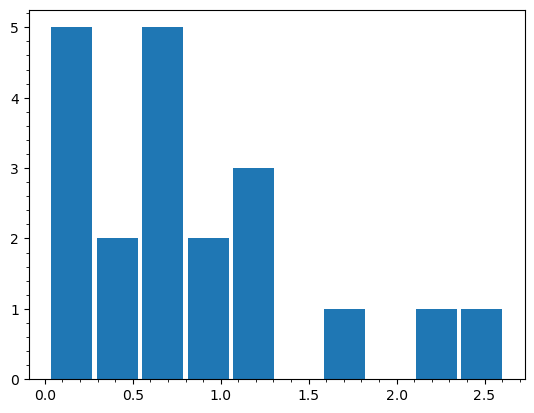

In [12]:
plt.hist(abs(Z), bins=10, rwidth=0.9) #, density=True)
plt.minorticks_on()
plt.show()

In [13]:
X1 = X[abs(Z) < 2.5]
Y1 = Y[abs(Z) < 2.5]

In [14]:
regr_ls1 = LinearLS()
regr_ls1.fit(X1[:,None], Y1)
mod_ls1 = regr_ls1.model
print(np.asarray(mod_ls1.param))

[-1.62812987  1.11470296]


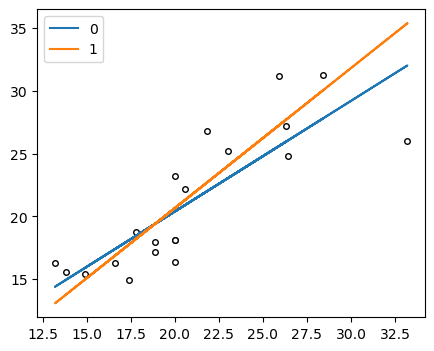

In [17]:
plt.figure(figsize=(5,4))
plt.scatter(X, Y, s=16, c='w', edgecolors='k')
plt.plot(X, mod_ls.evaluate(X[:,None]), label='0')
plt.plot(X, mod_ls1.evaluate(X[:,None]), label='1')
plt.legend()
plt.show()

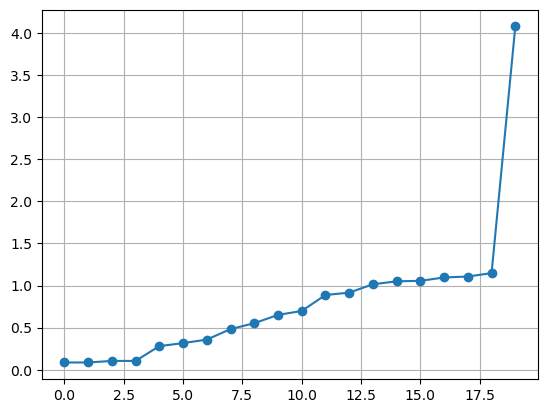

In [19]:
Y_e = mod_ls1.evaluate(X[:,None])
E1 = abs(mod_ls1.evaluate(X[:,None]) - Y)
Z1 = modified_zscore(E1)
plt.plot(sorted(abs(Z1)), marker='o')
plt.grid(1)
plt.show()